# Importing Modules and loading data

In [17]:
import sys
import os
sys.path.append('./Scripts')
sys.path.append('./Files')
sys.path.append('./Datasets')

In [18]:
os.system('pip install nltk')
os.system('pip install openpyxl')
os.system('pip install emot')

1

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import openpyxl
import emot
import pickle

# from google.colab import files
from nltk.corpus import stopwords
import nltk
import seaborn as sns
nltk.download('punkt')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

from dataCleaner import preProcess
import ArStemmerLib as lib
import lexicon
from lexicon import calc_lexicon

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yosr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
df2 = pd.read_csv('Datasets/tweets_train.csv')
df1 = pd.read_csv('Datasets/NU_EG_Twitter_corpus_train.csv')

In [21]:
df1.head(10)

,id,sentiment,tweet
0,271,negative,فينو الاهبل ابن الاهبل
1,131,positive,على المصرييييين وجمالهم ربنا يحميهم #MinaAtta ...
2,118,positive,@Kholoudkewan دول كتير اوى ودمهم خفيف العمارة...
3,6,negative,انا بعد كده خلى اللى يوعنى بحاجه همضى على و...
4,3430,negative,انا هنتحر
5,4,positive,في حفظ الله يا ريس http://t.co/RGKtP9QHZB
6,5,positive,يا عيون عطشان عطشانة سهر يا قلوب تعبانة تعبانة...
7,10,negative,#زهقنا_من اسامي اكونتات البنات على مواقع التوا...
8,11,positive,@Omarr793 حمد الله ع السلامة ✋
9,12,negative,@ahmedeslam07 أحا مين ؟!


In [22]:
df2.rename(columns={"text":"tweet"},inplace=True)

In [23]:
#Appending the data of the two datasets into one data frame
df = df2.append(df1,ignore_index = True)

C:\Users\yosr\AppData\Local\Temp\ipykernel_13284\2019465929.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df2.append(df1,ignore_index = True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12605 entries, 0 to 12604
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet      12605 non-null  object 
 1   sentiment  11787 non-null  object 
 2   id         2746 non-null   float64
dtypes: float64(1), object(2)
memory usage: 295.6+ KB


In [25]:
df.drop(df[df['sentiment']=='OBJ'].index, inplace = True)
df.drop(df[df['sentiment']=='OBJ"'].index, inplace = True)

In [26]:
df.drop("id", axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6637 entries, 1 to 12604
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      6637 non-null   object
 1   sentiment  5819 non-null   object
dtypes: object(2)
memory usage: 155.6+ KB


In [28]:
df = df.dropna()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819 entries, 1 to 12604
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      5819 non-null   object
 1   sentiment  5819 non-null   object
dtypes: object(2)
memory usage: 136.4+ KB


In [30]:
df['sentiment'] = df['sentiment'].replace(['NEG"'],'negative')
df['sentiment'] = df['sentiment'].replace(['POS"'],'positive')
df['sentiment'] = df['sentiment'].replace(['NEG'],'negative')
df['sentiment'] = df['sentiment'].replace(['POS'],'positive')
df['sentiment'] = df['sentiment'].replace(['NEUTRAL'],'neutral')


In [31]:
df.head()

,tweet,sentiment
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,positive
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,negative
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,neutral
5,#انتخبوا_العرص #انتخبوا_البرص #مرسى_رئيسى #اين...,neutral
6,امير عيد هو اللي فعلا يتقال عليه ستريكر صريح #...,positive


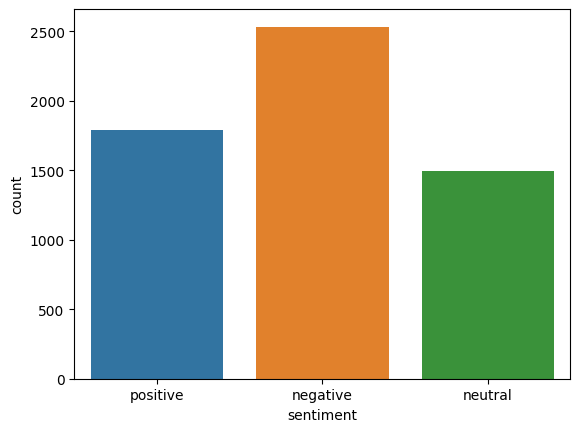

In [32]:
_ = sns.countplot(x='sentiment', data=df)

Stop words in Arabic

In [33]:
print(stopwords.words('arabic'))

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

# Calling methods for preprocessing

In [34]:
df['tweet']

1        أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...
2        البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...
4        الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...
5        #انتخبوا_العرص #انتخبوا_البرص #مرسى_رئيسى #اين...
6        امير عيد هو اللي فعلا يتقال عليه ستريكر صريح #...
                               ...                        
12600    @wasfa_N الجمال مبيحتاح اي مكياج لناعم وله خشن...
12601    @TheMurexDor نتمني وجود الفنانة رنا سماحة افضل...
12602    ولد الهدى فالكائنات ضياء .. وفم الزمان تبسم وس...
12603    @mohamed71944156 @samarroshdy1 انت متناقض جدا ...
12604    منطقة السيدة زينب ليلة المولد @ مسجد السيدة زي...
Name: tweet, Length: 5819, dtype: object

In [35]:
preProcess(df=df)

# Vectorizers

In [36]:
count_vec = CountVectorizer(ngram_range=(1,1))

In [37]:
tfidf_vec = TfidfVectorizer()

# Splitting data

In [38]:
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(tfidf_vec.fit_transform(df['tweet']), df['sentiment'], test_size=0.25, random_state=1)

In [39]:
X_train_count,X_test_count,Y_train_count,Y_test_count = train_test_split(count_vec.fit_transform(df['tweet']), df['sentiment'], test_size=0.25, random_state=1)

In [40]:
X_train ,X_test ,Y_train ,Y_test  = train_test_split(df['tweet'], df['sentiment'], test_size=0.25, random_state=1)

In [41]:
Y_test_tfidf.head()

11321    positive
10302    negative
5807     negative
11911    negative
10507    negative
Name: sentiment, dtype: object

In [42]:
le = LabelEncoder()
Y_test_tfidf = le.fit_transform(Y_test_tfidf)
Y_test_count = le.fit_transform(Y_test_count)
Y_test = le.fit_transform(Y_test)
Y_train_tfidf = le.fit_transform(Y_train_tfidf)
Y_train_count = le.fit_transform(Y_train_count)
Y_train = le.fit_transform(Y_train)

# Naive Bayes

In [43]:
cl = MultinomialNB()

## Using Lexicon and Count Vectorization

In [44]:
#calculate the lexicon
tweet_train_lex = []
for tweet in X_train:
    tweet_train_lex.append(calc_lexicon(u"%s" %tweet))

tweet_test_lex = []
for tweet in X_test:
    tweet_test_lex.append(calc_lexicon(u"%s" %tweet))

In [45]:
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
tweet_lex_train_sparse = csr_matrix(tweet_train_lex)
tweet_lex_test_sparse = csr_matrix(tweet_test_lex)
tweet_lex_test_sparse

<1455x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1163 stored elements in Compressed Sparse Row format>

In [46]:
train_feature_matrix = hstack((X_train_count, tweet_lex_train_sparse))
test_feature_matrix = hstack((X_test_count, tweet_lex_test_sparse))
test_feature_matrix

<1455x18739 sparse matrix of type '<class 'numpy.float64'>'
	with 14432 stored elements in Compressed Sparse Row format>

In [47]:
nb_lexicon = cl.fit(train_feature_matrix,Y_train)
predicted = cl.predict(test_feature_matrix)
acc = accuracy_score(Y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test,predicted))

accuracy = 60.20618556701031%
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       639
           1       0.43      0.24      0.31       371
           2       0.62      0.66      0.64       445

    accuracy                           0.60      1455
   macro avg       0.56      0.56      0.55      1455
weighted avg       0.58      0.60      0.58      1455



In [48]:
nb_lex_model_path = 'Models/nb_lexicon_model.sav'
pickle.dump(nb_lexicon, open(nb_lex_model_path,'wb'))

## Using TF-IDF

In [49]:
nb_tfidf = cl.fit(X_train_tfidf, Y_train_tfidf)
p = cl.predict(X_test_tfidf)
acc = accuracy_score(Y_test_tfidf,p)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test,p))

accuracy = 56.56357388316151%
              precision    recall  f1-score   support

           0       0.53      0.92      0.67       639
           1       0.61      0.06      0.11       371
           2       0.68      0.48      0.56       445

    accuracy                           0.57      1455
   macro avg       0.61      0.49      0.45      1455
weighted avg       0.60      0.57      0.50      1455



In [ ]:
nb_tfidf_model_path = 'Models/nb_tfidf_model.sav'
pickle.dump(nb_tfidf, open(nb_tfidf_model_path,'wb'))

# Lexicon + TF-IDF

In [60]:
train_feature_matrix_tf = hstack((X_train_tfidf, tweet_lex_train_sparse))
test_feature_matrix_tf = hstack((X_test_tfidf, tweet_lex_test_sparse))
test_feature_matrix_tf

<1455x18739 sparse matrix of type '<class 'numpy.float64'>'
	with 14432 stored elements in Compressed Sparse Row format>

In [62]:
nb_lex_tfidf = cl.fit(train_feature_matrix_tf,Y_train)
predicted = cl.predict(test_feature_matrix_tf)
acc = accuracy_score(Y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test,predicted))

accuracy = 58.76288659793815%
              precision    recall  f1-score   support

           0       0.57      0.89      0.69       639
           1       0.62      0.05      0.09       371
           2       0.63      0.61      0.62       445

    accuracy                           0.59      1455
   macro avg       0.61      0.51      0.47      1455
weighted avg       0.60      0.59      0.52      1455



In [63]:
nb_lex_tfidf_model_path = 'Models/nb_lex_tfidf_model.sav'
pickle.dump(nb_lex_tfidf, open(nb_lex_tfidf_model_path,'wb'))

# Logistic Regression TF-IDF

In [51]:
lg =  LogisticRegression(max_iter=1000)

In [52]:
# make param grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(lg, param_grid, cv=10)

In [53]:
lg_model_path = 'Models/lg_tfidf_model.sav'

In [54]:
model.fit(X_train_tfidf,Y_train_tfidf)
pickle.dump(model, open(lg_model_path,'wb'))

In [55]:
# make prediction and print accuracy
prediction = model.predict(X_test_tfidf)
print(f"Accuracy score is {accuracy_score(Y_test_tfidf, prediction):.2f}")

Accuracy score is 0.58


In [56]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.55      0.88      0.68       639
           1       0.53      0.14      0.22       371
           2       0.67      0.51      0.58       445

    accuracy                           0.58      1455
   macro avg       0.58      0.51      0.49      1455
weighted avg       0.58      0.58      0.53      1455



# Logistic Reg using Lexicon + Count Vectorizer

In [64]:
lg_lexicon = model.fit(train_feature_matrix,Y_train)
pickle.dump(model, open(lg_model_path,'wb'))
prediction = model.predict(test_feature_matrix)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))

Accuracy score is 0.59
              precision    recall  f1-score   support

           0       0.60      0.80      0.69       639
           1       0.44      0.16      0.23       371
           2       0.60      0.64      0.62       445

    accuracy                           0.59      1455
   macro avg       0.55      0.53      0.51      1455
weighted avg       0.56      0.59      0.55      1455



In [65]:
lg_lexicon_model_path = 'Models/lg_lexicon_model.sav'
pickle.dump(lg_lexicon, open(lg_lexicon_model_path,'wb'))